In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names

The dataset we're using today contains information about flowers called an iris.  We're going to use K-Means clustering to atttempt to identify unique types of iris.

Step 1:  Use my method below to identify how many groups are in the dataset.

Step 2:  add the kmeans cluster labels into the dataframe df.


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

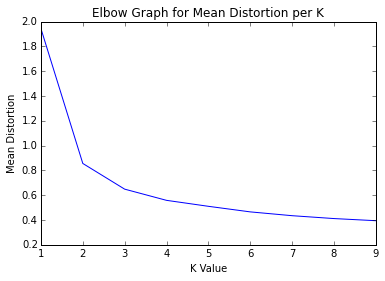

In [5]:
find_k(np.matrix(X), range(1,10),1)

It looks like there could be two or three clusters

##Two Clusters

In [7]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans_model_two = KMeans(n_clusters=2, random_state=42)
kmeans_model_two.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [11]:
df['labels'] = kmeans_model_two.labels_

In [17]:
df['labels'].value_counts()

0    100
1     50
dtype: int64

In [20]:
df[df['labels'] == 0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,100.000000,100.000000,100.000000,100.000000,100
mean,6.262000,2.872000,4.906000,1.676000,0
std,0.662834,0.332751,0.825578,0.424769,0
min,4.900000,2.000000,3.000000,1.000000,0
25%,5.800000,2.700000,4.375000,1.300000,0
50%,6.300000,2.900000,4.900000,1.600000,0
75%,6.700000,3.025000,5.525000,2.000000,0
max,7.900000,3.800000,6.900000,2.500000,0


In [21]:
df[df['labels'] == 1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,50.00000,50.000000,50.000000,50.00000,50
mean,5.00600,3.418000,1.464000,0.24400,1
std,0.35249,0.381024,0.173511,0.10721,0
min,4.30000,2.300000,1.000000,0.10000,1
25%,4.80000,3.125000,1.400000,0.20000,1
50%,5.00000,3.400000,1.500000,0.20000,1
75%,5.20000,3.675000,1.575000,0.30000,1
max,5.80000,4.400000,1.900000,0.60000,1


###Cluster 0:
 * Longer, narrower sepals
 * Longer, wider petals

###Cluster 1:
 * Shorter, wider sepals
 * Shorter, narrower petals

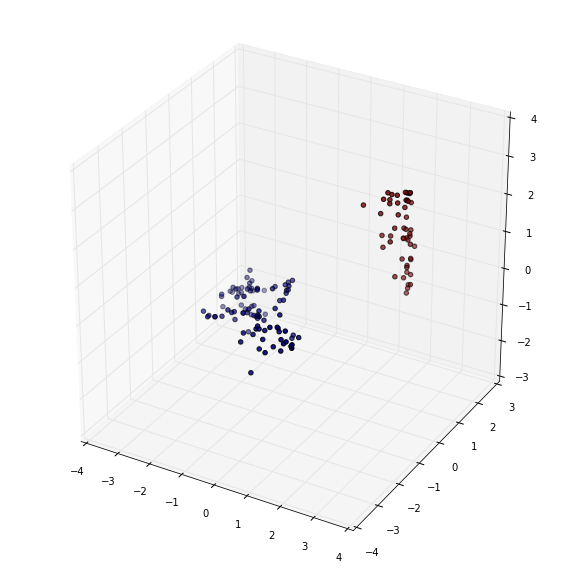

In [23]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model_two.labels_)

##Three Clusters

In [25]:
kmeans_model_three = KMeans(n_clusters=3, random_state=42)
kmeans_model_three.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [26]:
df['labels'] = kmeans_model_three.labels_

In [27]:
df['labels'].value_counts()

2    53
1    50
0    47
dtype: int64

In [28]:
df[df['labels'] == 0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,47.000000,47.000000,47.000000,47.000000,47
mean,6.780851,3.095745,5.510638,1.972340,0
std,0.490624,0.262063,0.638011,0.330811,0
min,5.900000,2.500000,4.400000,1.400000,0
25%,6.400000,3.000000,5.050000,1.800000,0
50%,6.700000,3.100000,5.600000,2.000000,0
75%,7.050000,3.200000,5.900000,2.300000,0
max,7.900000,3.800000,6.900000,2.500000,0


In [29]:
df[df['labels'] == 1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,50.00000,50.000000,50.000000,50.00000,50
mean,5.00600,3.418000,1.464000,0.24400,1
std,0.35249,0.381024,0.173511,0.10721,0
min,4.30000,2.300000,1.000000,0.10000,1
25%,4.80000,3.125000,1.400000,0.20000,1
50%,5.00000,3.400000,1.500000,0.20000,1
75%,5.20000,3.675000,1.575000,0.30000,1
max,5.80000,4.400000,1.900000,0.60000,1


In [30]:
df[df['labels'] == 2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,53.000000,53.000000,53.000000,53.000000,53
mean,5.801887,2.673585,4.369811,1.413208,2
std,0.405487,0.254310,0.560420,0.311348,0
min,4.900000,2.000000,3.000000,1.000000,2
25%,5.600000,2.500000,4.000000,1.200000,2
50%,5.800000,2.700000,4.400000,1.300000,2
75%,6.100000,2.900000,4.800000,1.500000,2
max,6.600000,3.000000,5.600000,2.400000,2


###Cluster 0:
 * Longest sepals
 * Middle width sepals
 * Longest petals
 * Widest petals

###Cluster 1:
 * Shortest sepals
 * Widest sepals
 * Shortest petals
 * Narrowest petals
 
###Cluster 2:
 * Middle length sepals
 * Narrowest sepals
 * Middle length petals
 * Middle width petals

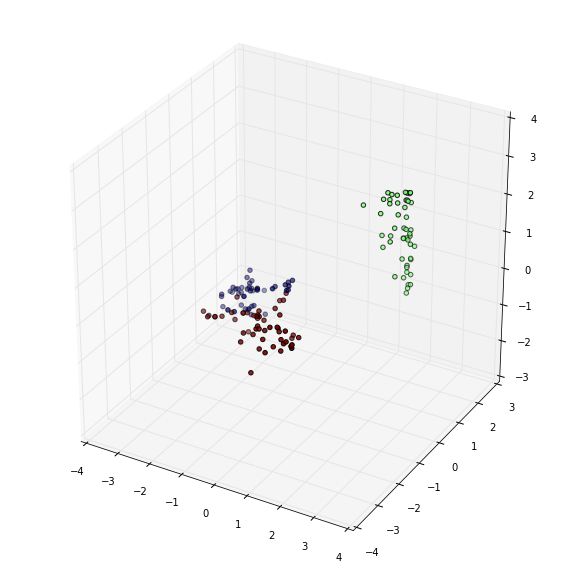

In [31]:
model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model_three.labels_)

###It looks like this data splits best into two clusters 